In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
def one_hot_encode(labels):
  n_labels = len(labels)
  n_unique_labels =len(np.unique(labels))
  one_hot_encode = np.zeros((n_labels,n_unique_labels))
  one_hot_encode[np.arange(n_labels),labels]=1
  return one_hot_encode


In [3]:
dataset = pd.read_csv('C:/Users/Dell/Desktop/RITHU/Notebook Stats and ML Models/Projects/Bank note/BankNote_Authentication.csv')

In [4]:
dataset['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [5]:
features = dataset[dataset.columns[0:4]].values
class_label = dataset[dataset.columns[4]].values
Y = one_hot_encode(class_label)

In [6]:
features

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [7]:
X,Y = shuffle(features,Y,random_state=1)

In [8]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2,random_state=42)
print(train_x.shape)
print(test_x.shape)

(1097, 4)
(275, 4)


In [9]:
learning_rate =0.3
training_epochs = 1000
cost_history = np.empty([1],dtype=float)
n_dim = X.shape[1]
n_class=2

n_hidden_1=60
n_hidden_2=60
n_hidden_3=60
n_hidden_4=60
print(n_dim)


4


In [10]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [11]:
x = tf.placeholder(tf.float32,[None,n_dim])
w = tf.Variable(tf.zeros([n_dim,n_class]))
b =tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32,[None,n_class])


In [12]:
def multilayer_perceptron(x,weights,biases):
  layer1 = tf.add(tf.matmul(x,weights['h1']),bias['b1'])
  layer1 = tf.nn.relu(layer1)

  layer2 = tf.add(tf.matmul(layer1,weights['h2']),bias['b2'])
  layer2 = tf.nn.relu(layer2)

  layer3 = tf.add(tf.matmul(layer2,weights['h3']),bias['b3'])
  layer3 = tf.nn.relu(layer3)

  layer4 = tf.add(tf.matmul(layer3,weights['h4']),bias['b4'])
  layer4 = tf.nn.sigmoid(layer4)
  
  out_layer = tf.matmul(layer4,weights['out'])+ bias['out']

  return (out_layer)

In [13]:
weights={
    'h1': tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3':tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4':tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_hidden_4,n_class]))
}

In [14]:
bias ={
    'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4':tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_class]))
}

In [15]:
init = tf.global_variables_initializer()

y = multilayer_perceptron(x,weights,bias)


In [16]:
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y,labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_function) 
sess = tf.Session()
sess.run(init)
mse_history=[]
accuracy_history=[]

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [17]:
for epoch in range(training_epochs):
  sess.run(training_step,feed_dict={x:train_x,y_:train_y})
  cost = sess.run(cost_function,feed_dict={x:train_x,y_:train_y})
  cost_history = np.append(cost_history,cost)
  correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
  pred_y = sess.run(y,feed_dict={x:test_x})
  mse = tf.reduce_mean(tf.square(pred_y-test_y))
  mse_ = sess.run(mse)
  mse_history.append(mse_)
  accuracy = sess.run(accuracy,feed_dict={x:train_x,y_:train_y})
  accuracy_history.append(accuracy)
  print('epoch -',epoch,' -',' cost',cost,' - MSE',mse,' -train_accuracy',accuracy)


epoch - 0  -  cost 3.1268203  - MSE Tensor("Mean_2:0", shape=(), dtype=float64)  -train_accuracy 0.5587967
epoch - 1  -  cost 1.21565  - MSE Tensor("Mean_4:0", shape=(), dtype=float64)  -train_accuracy 0.6016408
epoch - 2  -  cost 1.8648705  - MSE Tensor("Mean_6:0", shape=(), dtype=float64)  -train_accuracy 0.6235187
epoch - 3  -  cost 0.4401874  - MSE Tensor("Mean_8:0", shape=(), dtype=float64)  -train_accuracy 0.81494987
epoch - 4  -  cost 0.19264145  - MSE Tensor("Mean_10:0", shape=(), dtype=float64)  -train_accuracy 0.92889696
epoch - 5  -  cost 0.11994459  - MSE Tensor("Mean_12:0", shape=(), dtype=float64)  -train_accuracy 0.96536005
epoch - 6  -  cost 0.0895828  - MSE Tensor("Mean_14:0", shape=(), dtype=float64)  -train_accuracy 0.97356427
epoch - 7  -  cost 0.07670899  - MSE Tensor("Mean_16:0", shape=(), dtype=float64)  -train_accuracy 0.98541474
epoch - 8  -  cost 0.06379929  - MSE Tensor("Mean_18:0", shape=(), dtype=float64)  -train_accuracy 0.98906106
epoch - 9  -  cost 0.062

epoch - 75  -  cost 0.01654507  - MSE Tensor("Mean_152:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 76  -  cost 0.016320387  - MSE Tensor("Mean_154:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 77  -  cost 0.01603581  - MSE Tensor("Mean_156:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 78  -  cost 0.015868599  - MSE Tensor("Mean_158:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 79  -  cost 0.015708622  - MSE Tensor("Mean_160:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 80  -  cost 0.015588853  - MSE Tensor("Mean_162:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 81  -  cost 0.015477047  - MSE Tensor("Mean_164:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 82  -  cost 0.0153672155  - MSE Tensor("Mean_166:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 83  -  cost 0.015265671  - MSE Tensor("Mean_168:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 84  -  cost 0.015170848  - MSE Tensor("

epoch - 153  -  cost 0.010343124  - MSE Tensor("Mean_308:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 154  -  cost 0.010266681  - MSE Tensor("Mean_310:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 155  -  cost 0.01012091  - MSE Tensor("Mean_312:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 156  -  cost 0.010030782  - MSE Tensor("Mean_314:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 157  -  cost 0.009975453  - MSE Tensor("Mean_316:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 158  -  cost 0.009892466  - MSE Tensor("Mean_318:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 159  -  cost 0.009848856  - MSE Tensor("Mean_320:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 160  -  cost 0.009803474  - MSE Tensor("Mean_322:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 161  -  cost 0.009753134  - MSE Tensor("Mean_324:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 162  -  cost 0.009710079  - MS

epoch - 230  -  cost 0.007234078  - MSE Tensor("Mean_462:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 231  -  cost 0.007203186  - MSE Tensor("Mean_464:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 232  -  cost 0.007182765  - MSE Tensor("Mean_466:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 233  -  cost 0.0071612345  - MSE Tensor("Mean_468:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 234  -  cost 0.007136992  - MSE Tensor("Mean_470:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 235  -  cost 0.007115309  - MSE Tensor("Mean_472:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 236  -  cost 0.007096504  - MSE Tensor("Mean_474:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 237  -  cost 0.0070783007  - MSE Tensor("Mean_476:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 238  -  cost 0.0070604286  - MSE Tensor("Mean_478:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 239  -  cost 0.007042798  

epoch - 307  -  cost 0.0060567376  - MSE Tensor("Mean_616:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 308  -  cost 0.006044832  - MSE Tensor("Mean_618:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 309  -  cost 0.006032939  - MSE Tensor("Mean_620:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 310  -  cost 0.006021013  - MSE Tensor("Mean_622:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 311  -  cost 0.00600905  - MSE Tensor("Mean_624:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 312  -  cost 0.005997052  - MSE Tensor("Mean_626:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 313  -  cost 0.0059851035  - MSE Tensor("Mean_628:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 314  -  cost 0.005973201  - MSE Tensor("Mean_630:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 315  -  cost 0.005961301  - MSE Tensor("Mean_632:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 316  -  cost 0.0059493515  -

epoch - 384  -  cost 0.004966687  - MSE Tensor("Mean_770:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 385  -  cost 0.00495776  - MSE Tensor("Mean_772:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 386  -  cost 0.0049487078  - MSE Tensor("Mean_774:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 387  -  cost 0.00493931  - MSE Tensor("Mean_776:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 388  -  cost 0.004929495  - MSE Tensor("Mean_778:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 389  -  cost 0.0049190777  - MSE Tensor("Mean_780:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 390  -  cost 0.0049083964  - MSE Tensor("Mean_782:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 391  -  cost 0.004899295  - MSE Tensor("Mean_784:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 392  -  cost 0.0048907395  - MSE Tensor("Mean_786:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 393  -  cost 0.004882325  -

epoch - 461  -  cost 0.0042891344  - MSE Tensor("Mean_924:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 462  -  cost 0.004282215  - MSE Tensor("Mean_926:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 463  -  cost 0.0042752847  - MSE Tensor("Mean_928:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 464  -  cost 0.0042683287  - MSE Tensor("Mean_930:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 465  -  cost 0.004261327  - MSE Tensor("Mean_932:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 466  -  cost 0.0042542536  - MSE Tensor("Mean_934:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 467  -  cost 0.004247069  - MSE Tensor("Mean_936:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 468  -  cost 0.004239732  - MSE Tensor("Mean_938:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 469  -  cost 0.004232211  - MSE Tensor("Mean_940:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 470  -  cost 0.0042245286

epoch - 537  -  cost 0.0037507946  - MSE Tensor("Mean_1076:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 538  -  cost 0.0037439258  - MSE Tensor("Mean_1078:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 539  -  cost 0.0037379083  - MSE Tensor("Mean_1080:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 540  -  cost 0.0037320536  - MSE Tensor("Mean_1082:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 541  -  cost 0.0037264097  - MSE Tensor("Mean_1084:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 542  -  cost 0.0037210095  - MSE Tensor("Mean_1086:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 543  -  cost 0.0037158  - MSE Tensor("Mean_1088:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 544  -  cost 0.0037107207  - MSE Tensor("Mean_1090:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 545  -  cost 0.0037057286  - MSE Tensor("Mean_1092:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 546  -  cost 0

epoch - 613  -  cost 0.0033873417  - MSE Tensor("Mean_1228:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 614  -  cost 0.003366955  - MSE Tensor("Mean_1230:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 615  -  cost 0.0033513333  - MSE Tensor("Mean_1232:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 616  -  cost 0.003343982  - MSE Tensor("Mean_1234:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 617  -  cost 0.003339168  - MSE Tensor("Mean_1236:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 618  -  cost 0.003334208  - MSE Tensor("Mean_1238:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 619  -  cost 0.003328441  - MSE Tensor("Mean_1240:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 620  -  cost 0.0033197307  - MSE Tensor("Mean_1242:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 621  -  cost 0.0032998733  - MSE Tensor("Mean_1244:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 622  -  cost 0.0

epoch - 689  -  cost 0.00303039  - MSE Tensor("Mean_1380:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 690  -  cost 0.0030268724  - MSE Tensor("Mean_1382:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 691  -  cost 0.0030232589  - MSE Tensor("Mean_1384:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 692  -  cost 0.0030194637  - MSE Tensor("Mean_1386:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 693  -  cost 0.0030153033  - MSE Tensor("Mean_1388:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 694  -  cost 0.003010539  - MSE Tensor("Mean_1390:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 695  -  cost 0.003005233  - MSE Tensor("Mean_1392:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 696  -  cost 0.0030003544  - MSE Tensor("Mean_1394:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 697  -  cost 0.0029963162  - MSE Tensor("Mean_1396:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 698  -  cost 0.

epoch - 765  -  cost 0.0027594583  - MSE Tensor("Mean_1532:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 766  -  cost 0.002756323  - MSE Tensor("Mean_1534:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 767  -  cost 0.0027531122  - MSE Tensor("Mean_1536:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 768  -  cost 0.0027500065  - MSE Tensor("Mean_1538:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 769  -  cost 0.0027471022  - MSE Tensor("Mean_1540:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 770  -  cost 0.0027443545  - MSE Tensor("Mean_1542:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 771  -  cost 0.0027416945  - MSE Tensor("Mean_1544:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 772  -  cost 0.0027390867  - MSE Tensor("Mean_1546:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 773  -  cost 0.0027364944  - MSE Tensor("Mean_1548:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 774  -  cost

epoch - 841  -  cost 0.0025777402  - MSE Tensor("Mean_1684:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 842  -  cost 0.0025755432  - MSE Tensor("Mean_1686:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 843  -  cost 0.002573365  - MSE Tensor("Mean_1688:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 844  -  cost 0.00257121  - MSE Tensor("Mean_1690:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 845  -  cost 0.0025690685  - MSE Tensor("Mean_1692:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 846  -  cost 0.0025669392  - MSE Tensor("Mean_1694:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 847  -  cost 0.0025648202  - MSE Tensor("Mean_1696:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 848  -  cost 0.0025627078  - MSE Tensor("Mean_1698:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 849  -  cost 0.0025606006  - MSE Tensor("Mean_1700:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 850  -  cost 0

epoch - 917  -  cost 0.0024202713  - MSE Tensor("Mean_1836:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 918  -  cost 0.00241828  - MSE Tensor("Mean_1838:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 919  -  cost 0.0024162475  - MSE Tensor("Mean_1840:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 920  -  cost 0.0024141623  - MSE Tensor("Mean_1842:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 921  -  cost 0.0024119688  - MSE Tensor("Mean_1844:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 922  -  cost 0.002409676  - MSE Tensor("Mean_1846:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 923  -  cost 0.0024074523  - MSE Tensor("Mean_1848:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 924  -  cost 0.0024053506  - MSE Tensor("Mean_1850:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 925  -  cost 0.0024032828  - MSE Tensor("Mean_1852:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 926  -  cost 0

epoch - 993  -  cost 0.0021647564  - MSE Tensor("Mean_1988:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 994  -  cost 0.0021621904  - MSE Tensor("Mean_1990:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 995  -  cost 0.0021596614  - MSE Tensor("Mean_1992:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 996  -  cost 0.002157141  - MSE Tensor("Mean_1994:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 997  -  cost 0.002154632  - MSE Tensor("Mean_1996:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 998  -  cost 0.0021521081  - MSE Tensor("Mean_1998:0", shape=(), dtype=float64)  -train_accuracy 1.0
epoch - 999  -  cost 0.0021495393  - MSE Tensor("Mean_2000:0", shape=(), dtype=float64)  -train_accuracy 1.0


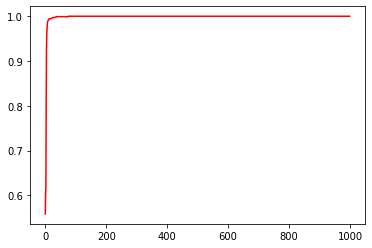

In [19]:
plt.plot(range(1000),accuracy_history,'r')
plt.show()

In [20]:
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print('Test accuracy',sess.run(accuracy,feed_dict={x:test_x,y_:test_y}))
pred_y = sess.run(y,feed_dict={x:test_x})
mse = tf.reduce_mean(tf.square(pred_y-test_y))
print('Mse:',sess.run(mse))


Test accuracy 1.0
Mse: 18.382203330292715
